<a href="https://colab.research.google.com/github/edsolibet/AP-175-Energy-Band-Diagram/blob/master/sine_ml_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==2.4.1

In [18]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

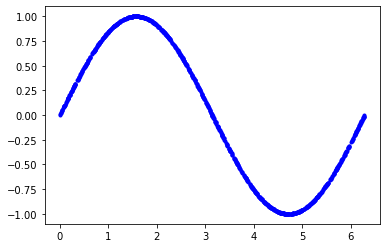

In [50]:
# generate data
samples = 1000
seed = 1337
np.random.seed(seed)
tf.random.set_seed(seed)

x_val = np.random.uniform(low = 0, high = 2*m.pi, size = samples)
np.random.shuffle(x_val)
y_val = np.sin(x_val)

plt.plot(x_val, y_val, 'b.')
plt.show()

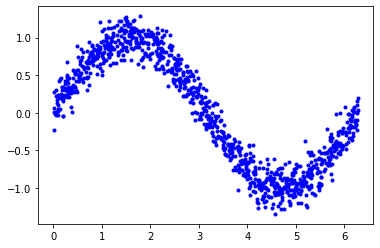

In [51]:
# add noise
y_val += 0.15 * np.random.randn(*y_val.shape)

plt.plot(x_val, y_val, 'b.')
plt.show()

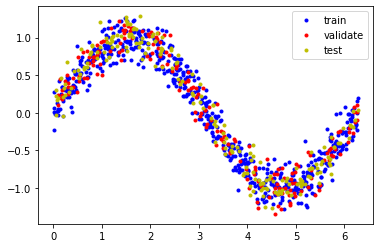

In [52]:
# split data
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)

x_train, x_validate, x_test = np.split(x_val, [train_split, test_split])
y_train, y_validate, y_test = np.split(y_val, [train_split, test_split])

assert (x_train.size + x_validate.size + x_test.size) == samples

plt.plot(x_train, y_train, 'b.', label = 'train')
plt.plot(x_validate, y_validate, 'r.', label = 'validate')
plt.plot(x_test, y_test, 'y.', label = 'test')
plt.legend()
plt.show()

In [68]:
# define model architecture
model_1 = tf.keras.Sequential()

model_1.add(keras.layers.Dense(16, activation = 'relu', input_shape = (1,)))
model_1.add(keras.layers.Dense(16, activation = 'relu'))
model_1.add(keras.layers.Dense(1))
model_1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

model_1.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [69]:
# training them model
history_1 = model_1.fit(x_train, y_train, epochs = 1000, batch_size = 64,
                        validation_data = (x_validate, y_validate))

Epoch 1/1000
10/10 [==============================] - 1s 20ms/step - loss: 0.4400 - mae: 0.5623 - val_loss: 0.4568 - val_mae: 0.5884
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4200 - mae: 0.5615 - val_loss: 0.4321 - val_mae: 0.5670
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3904 - mae: 0.5355 - val_loss: 0.4145 - val_mae: 0.5467
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3663 - mae: 0.5194 - val_loss: 0.3949 - val_mae: 0.5409
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3491 - mae: 0.5136 - val_loss: 0.3768 - val_mae: 0.5261
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3468 - mae: 0.5077 - val_loss: 0.3589 - val_mae: 0.5101
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3215 - mae: 0.4900 - val_loss: 0.3429 - val_mae: 0.4968
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 0

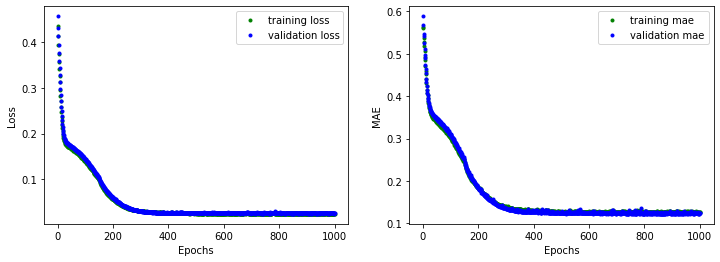

In [70]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
epochs = range(1, len(loss) + 1)
skip = 0

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs[skip:], loss[skip:], 'g.', label = 'training loss')
plt.plot(epochs[skip:], val_loss[skip:], 'b.', label = 'validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs[skip:], mae[skip:], 'g.', label = 'training mae')
plt.plot(epochs[skip:], val_mae[skip:], 'b.', label = 'validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

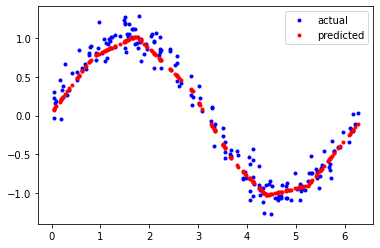

In [71]:
# prediction

predictions = model_1.predict(x_test)

plt.clf()
plt.plot(x_test, y_test, 'b.', label = 'actual')
plt.plot(x_test, predictions, 'r.', label = 'predicted')
plt.legend()
plt.show()